# Cu A summary


In [2]:
import sys
import os
import time
import numpy as np
np.random.seed(42)

import json

import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
git_dir = os.path.join(os.path.expanduser('~'), 'git', 'nh3-analysis')

from refl1d.names import *
from refl1d import errors

from bumps.fitters import fit

import importlib

import copper_sample as cu
importlib.reload(cu)

<module 'copper_sample' from '/Users/mathieu/git/nh3-analysis/july2023/notebooks/copper_sample.py'>

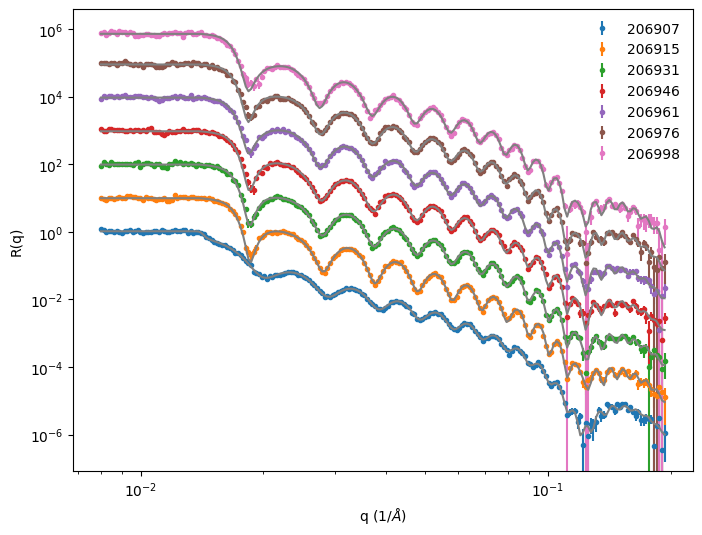

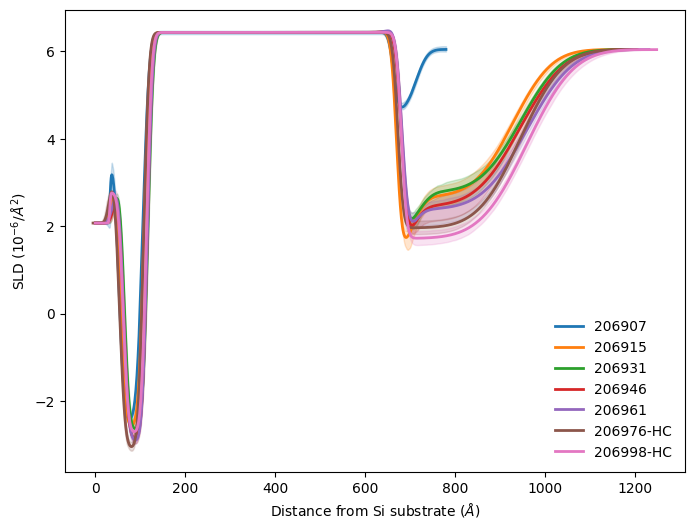

In [6]:
data_list = [206907, 206915, 206931, 206946, 206961, '206976-HC', '206998-HC']
z_offset = [5, 0, 0, 0, 0, -5, 0]


fig, axs = plt.subplots(1,1, dpi=100, figsize=(8,6), sharex=False)

scale = 1
multiplier = 10
for run in data_list:
    run = str(run).replace('-HC', '')
    data_file = os.path.join(git_dir, 'july2023', 'data', 'reduced', 'REFL_%s_combined_data_auto.txt' % run)
    raw_data = np.loadtxt(data_file, skiprows=1).T
    ocv_fit = os.path.join(git_dir, 'july2023', 'data', 'results', 'REFL_%s.json' % run)

    plt.errorbar(raw_data[0], scale*raw_data[1], yerr=scale*raw_data[2], label=run, linestyle='', marker='.')

    with open(ocv_fit, 'r') as f:
        data = json.load(f)    
        plt.plot(raw_data[0], scale*np.asarray(data['r_calc']), color='gray', label='', zorder=10)
    
    scale *= multiplier

plt.gca().legend(frameon=False)
plt.xlabel('q ($1/\AA$)')
plt.ylabel('R(q)')
plt.xscale('log')
plt.yscale('log')
plt.savefig('july2023-Rq-Cu-A.png')
plt.savefig('july2023-Rq-Cu-A.svg')

fig, axs = plt.subplots(1,1, dpi=100, figsize=(8,6), sharex=False)

for i, run in enumerate(data_list):
    ocv_fit = os.path.join(git_dir, 'july2023', 'data', 'results', 'REFL_%s.json' % run)

    with open(ocv_fit, 'r') as f:
        data = json.load(f)    
        plt.plot(np.asarray(data['z'])+z_offset[i], data['sld'], markersize=4, label=run, linewidth=2,)
        plt.fill_between(np.asarray(data['z'])+z_offset[i], data['sld_low'], data['sld_high'], alpha=0.2, color=plt.gca().lines[-1].get_color())


plt.gca().legend(frameon=False)
plt.xlabel('Distance from Si substrate ($\AA$)')
plt.ylabel('SLD ($10^{-6}/\AA^2$)')
plt.savefig('july2023-Cu-A.svg')
plt.savefig('july2023-Cu-A.png')

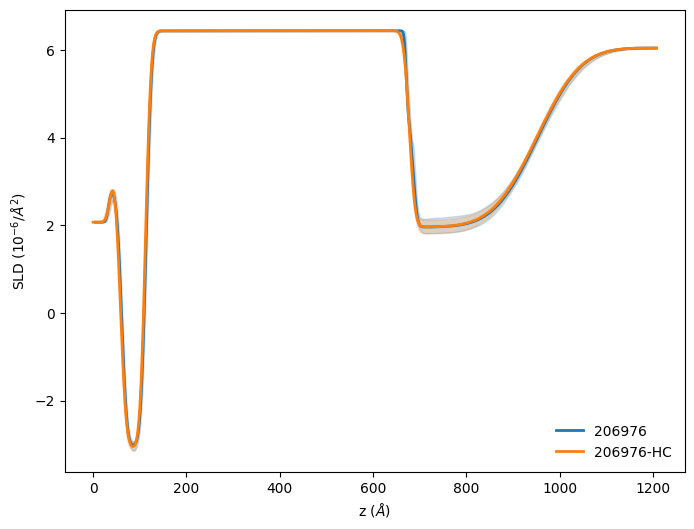

In [5]:
data_list = [206976, '206976-HC']
z_offset = [5, 0, 0, 0, 0, -5, 0]


fig, axs = plt.subplots(1,1, dpi=100, figsize=(8,6), sharex=False)

for i, run in enumerate(data_list):
    ocv_fit = os.path.join(git_dir, 'july2023', 'data', 'results', 'REFL_%s.json' % run)

    with open(ocv_fit, 'r') as f:
        data = json.load(f)    
        plt.plot(np.asarray(data['z'])+z_offset[i], data['sld'], markersize=4, label=run, linewidth=2,)
        plt.fill_between(np.asarray(data['z'])+z_offset[i], data['sld_low'], data['sld_high'], alpha=0.2, color=plt.gca().lines[-1].get_color())


plt.gca().legend(frameon=False)
plt.xlabel('z ($\AA$)')
plt.ylabel('SLD ($10^{-6}/\AA^2$)')
plt.savefig('july2023-Cu-A-206976-HC.svg')
plt.savefig('july2023-Cu-A-206976-HC.png')

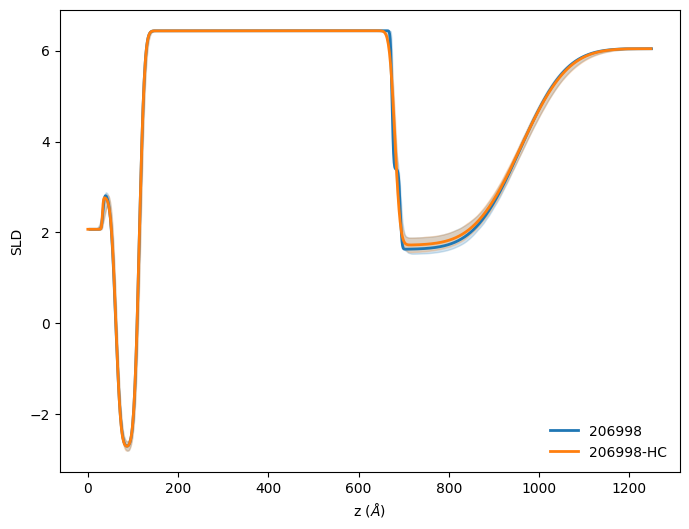

In [26]:
data_list = [206998, '206998-HC']
z_offset = [5, 0, 0, 0, 0, -5, 0]


fig, axs = plt.subplots(1,1, dpi=100, figsize=(8,6), sharex=False)

for i, run in enumerate(data_list):
    ocv_fit = os.path.join(git_dir, 'july2023', 'data', 'results', 'REFL_%s.json' % run)

    with open(ocv_fit, 'r') as f:
        data = json.load(f)    
        plt.plot(np.asarray(data['z'])+z_offset[i], data['sld'], markersize=4, label=run, linewidth=2,)
        plt.fill_between(np.asarray(data['z'])+z_offset[i], data['sld_low'], data['sld_high'], alpha=0.2, color=plt.gca().lines[-1].get_color())


plt.gca().legend(frameon=False)
plt.xlabel('z ($\AA$)')
plt.ylabel('SLD')
plt.savefig('july2023-Cu-A-206998-HC.svg')
plt.savefig('july2023-Cu-A-206998-HC.png')